In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import precision_score

In [2]:
# Data processing functions
def rename_file(path, label):
    i = 0
    for filename in os.listdir(path):
        try:
            extension = os.path.splitext(filename)[1]
            src = os.path.join(path, filename)
            dst = os.path.join(path, label + str(i) + extension)
            if not os.path.exists(dst):
                os.rename(src, dst)
                i+=1
            else:
                print("File already exists")
                i+=1
        except Exception as e:
            print(e)
            i+=1 
            continue
    print("Rename completed")

def resize_img(src,dst):
    for filename in os.listdir(src):
        try:
            img = Image.open(os.path.join(src, filename))
            new_img = img.resize((128,128))
            
            if not os.path.exists(dst):
                os.makedirs(dst)
                
            new_img.save(os.path.join(dst, filename))
        except Exception as e:
            print(e)
            continue
    print("Resize completed")

def load_image(path):
    img = Image.open(path)
    img_standardize = np.asarray(img.resize((128,128)))/255
    new_img = img_standardize.reshape(1,-1)
    plt.imshow(img)
    return new_img

In [3]:
def get_train_set(path,search):
    all_img = []
    label = []
    
    for filename in os.listdir(path):
        try:
            if re.search(search,filename):
                label.append(1)
            else: 
                label.append(0)
            
            img = Image.open(os.path.join(path, filename))
            img_arr = np.array(img)
            all_img.append(img_arr)
        except Exception as e:
            print(e)
            continue
        
    all_img_arr = np.array(all_img).reshape(len(all_img),-1)
    all_img_arr = all_img_arr.reshape(all_img_arr.shape[0],-1)
    label_arr = np.array(label).reshape(-1,1)
    all_img_arr_unique, idx = np.unique(all_img_arr,axis=0, return_index=True)
    label_arr_unique = label_arr[idx]
        
    return all_img_arr_unique/255, label_arr_unique.reshape(-1,)

In [4]:
data_path_1 = "plastic bottle"
data_path_2 = "others"
label_1 = "plasticBottle"
label_2 = "others"
destination = "training set"

# resize and rename image
# rename_file(data_path_1, label_1)
# resize_img(data_path_1, destination)
# rename_file(data_path_2, label_2)
# resize_img(data_path_2, destination)

In [5]:
''' 
destination = "training set"
label_1 = "plasticBottle" 
'''

# label data and train model
X_data, Y_data = get_train_set(destination,label_1)
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)
clf = svm.SVC()
clf.fit(x_train, y_train)

# evaluate model
print(f"accuracy of train set: {accuracy_score(y_train, clf.predict(x_train))}")
print(f"precision of train set: {precision_score(y_train, clf.predict(x_train))}")
print(f"\naccuracy of test set: {accuracy_score(y_test, clf.predict(x_test))}")
print(f"precision of test set: {precision_score(y_test, clf.predict(x_test))}")

accuracy of train set: 0.9169960474308301
precision of train set: 0.8776978417266187

accuracy of test set: 0.6880733944954128
precision of test set: 0.6909090909090909


This is a plastic bottle


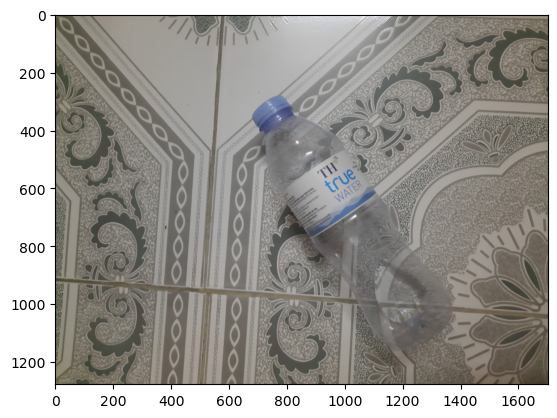

In [6]:
# Example 
path_guess = "example.jpg"
img = load_image(path_guess)
pred = clf.predict(img)
if pred == 1:
    print("This is a plastic bottle")
else:
    print("This is not a plastic bottle")